In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [2]:
data = pd.read_csv(r"data.csv")

### EDA

In [3]:
data.shape

(2227, 3)

In [4]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
print(data['x1'].median())
print(data['x2'].median())

data['x1'].fillna(data['x1'].median(), inplace = True)
data['x2'].fillna(data['x2'].median(), inplace = True)


-9.836555486
-1.04615092


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2227 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [8]:
data['x2_log'] = np.log(data['x2'])

AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


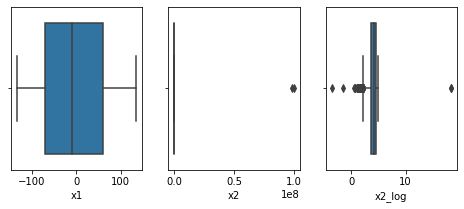

In [9]:
#plot outliers

plt.figure(figsize = (8,3))

plt.subplot(131)
print(sns.boxplot(data['x1']))
plt.subplot(132)
print(sns.boxplot((data['x2'])))
plt.subplot(133)
print(sns.boxplot((data['x2_log'])))

AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


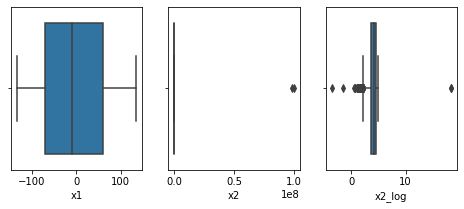

In [10]:
#plot outliers

plt.figure(figsize = (8,3))

plt.subplot(131)
print(sns.boxplot(data['x1']))
plt.subplot(132)
print(sns.boxplot((data['x2'])))
plt.subplot(133)
print(sns.boxplot((data['x2_log'])))

### IQR

AxesSubplot(0.125,0.125;0.775x0.755)


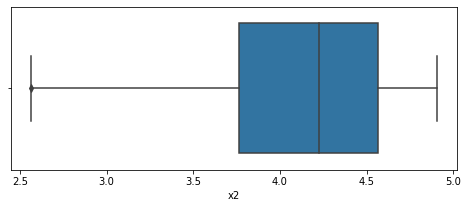

In [13]:
Q1 = data['x2_log'].quantile(0.25)
Q3 = data['x2_log'].quantile(0.75)
IQR = Q3-Q1

lower =  Q1-1.5*IQR
upper = Q3+1.5*IQR


data.drop(data[data['x2_log']>upper].index, inplace = True)
data.drop(data[data['x2_log']<lower].index, inplace = True)


#plot outliers

plt.figure(figsize = (8,3))
print(sns.boxplot(np.log(data['x2'])))

In [14]:
data.shape

(2153, 4)

In [15]:
data = data[['x1','x2','x2_log','y']]

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


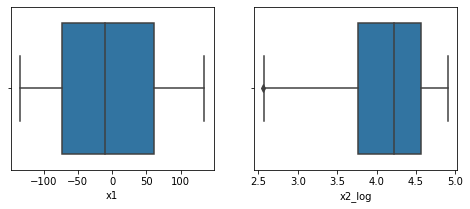

In [16]:
#Check outliers after removing 

plt.figure(figsize = (8,3))

plt.subplot(121)
print(sns.boxplot(data['x1']))
plt.subplot(122)
print(sns.boxplot((data['x2_log'])))

### Distribution

<AxesSubplot:xlabel='x2_log', ylabel='Density'>

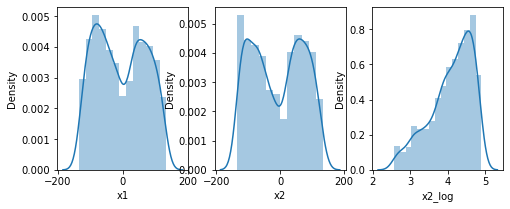

In [17]:
plt.figure(figsize = (8,3))
plt.subplot(131)
sns.distplot(data['x1'])
plt.subplot(132)
sns.distplot((data['x2']))
plt.subplot(133)
sns.distplot((data['x2_log']))




### Correlation

<AxesSubplot:>

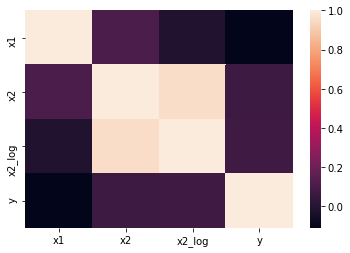

In [19]:
sns.heatmap(data.corr())


In [21]:
df = data[['x1','x2_log','y']]

In [22]:
df['x2_log'].fillna(df['x2_log'].median(), inplace = True)

***Here we filled na in log because na were throwing error in Logistic regression ***

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2225
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2153 non-null   float64
 1   x2_log  2153 non-null   float64
 2   y       2153 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 67.3 KB


### Splitting data in train and test 

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Features and Target Selection 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Fit features with Standred sScalling 
#X = ss.fit_transform(X)

### Step - 2: Train different Machine Learning models:

### Logistic Regression 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  =train_test_split(X,y,test_size=0.2, random_state=2)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Base Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('Base Model precision : ',precision_score(y_test,y_pred))
print('Standred Scaller Base recall : ',recall_score(y_test,y_pred))

Base Model Accuarcy :  57.30858468677494 %
Base Model precision :  0.49038461538461536
Standred Scaller Base recall :  0.2802197802197802


### SVM with Linear Kernal

In [28]:
#SVM kernal Linear Classification

from sklearn import svm
from sklearn import metrics


svmlinear = svm.SVC(kernel ='linear')
svmlinear.fit(X_train,y_train)
y_pred = svmlinear.predict(X_test)

print('Base Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Base Model Precision: ', precision_score(y_test, y_pred))
print('Base Model Recall: ', recall_score(y_test, y_pred))

KeyboardInterrupt: 

### SVM with RBF

In [ ]:
#SVM kernal Linear Classification

from sklearn import svm
from sklearn import metrics


svmlinear = svm.SVC(kernel ='rbf')
svmlinear.fit(X_train,y_train)
y_pred = svmlinear.predict(X_test)

print('Base Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Base Model Precision: ', precision_score(y_test, y_pred))
print('Base Model Recall: ', recall_score(y_test, y_pred))

### Decision Tree Classification

In [381]:
from sklearn.tree import DecisionTreeClassifier
dtreg = DecisionTreeClassifier()
dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(X_test)

print('Base Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Base Model Precision: ', precision_score(y_test, y_pred))
print('Base Model Recall: ', recall_score(y_test, y_pred))

Base Model Accuracy:  0.9071925754060325
Base Model Precision:  0.8944444444444445
Base Model Recall:  0.8846153846153846


### KNN 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print('Base Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Base Model Precision: ', precision_score(y_test, y_pred))
print('Base Model Recall: ', recall_score(y_test, y_pred))

Base Model Accuracy:  0.6496519721577726
Base Model Precision:  0.5875706214689266
Base Model Recall:  0.5714285714285714


### Step - 3: Perform proper hyperparameter tuning for each model from Step - 2 😢

### Logistic Regression Hyper parameter Tuning

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  =train_test_split(X,y,test_size=0.2, random_state=2)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Base Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('Base Model precision : ',precision_score(y_test,y_pred))
print('Standred Scaller Base recall : ',recall_score(y_test,y_pred))


#Random Search
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"C":np.logspace(-3,3,7),
              "penalty":['l1','l2'],
              'solver': ['newton-cg','lbfgs', 'liblinear'],
              'dual' : [True, False],
              'max_iter' : [100,110,120,130,140]}

random = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv = 3, n_jobs=-1)
random_result = random.fit(X_train,y_train)
grid = random.best_estimator_


print(random_result.best_score_,'\n','Best Parameter: ',  random_result.best_params_,'\nBest Estimator', random_result.best_estimator_)


#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))

Base Model Accuarcy :  57.30858468677494 %
Base Model precision :  0.49038461538461536
Standred Scaller Base recall :  0.2802197802197802
0.5993031358885017 
 Best Parameter:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 140, 'dual': False, 'C': 0.1} 
Best Estimator LogisticRegression(C=0.1, max_iter=140, penalty='l1', solver='liblinear')
After HyperTunning Model Accuarcy :  57.30858468677494 %
After HyperTunning Model precision :  0.49038461538461536
After HyperTunning Model recall :  0.2802197802197802


### SVM Hyper parameter Tuning

In [ ]:
#SVM kernal Linear Classification

from sklearn import svm
from sklearn import metrics


svmlinear = svm.SVC(kernel ='linear')
svmlinear.fit(X_train,y_train)
y_pred = svmlinear.predict(X_test)

print('Base Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Base Model Precision: ', precision_score(y_test, y_pred))
print('Base Model Recall: ', recall_score(y_test, y_pred))


#Random Search
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'kernel' :['linear'],"C":np.logspace(-2,10,5), "gamma":np.logspace(-9,3,5)}


random = RandomizedSearchCV(estimator=svmlinear, param_distributions=param_grid, cv = 3, n_jobs=-1)
random_result = random.fit(X_train,y_train)
grid = randm_model.best_estimator_


print(random_result.best_score_,'\n','Best Parameter: ',  random_result.best_params_,'\nBest Estimator', random_result.best_estimator_)


#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred = svmlinear.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))




Base Model Accuracy:  0.5777262180974478
Base Model Precision:  0.0
Base Model Recall:  0.0


### KNN Hyper prarameter Tunning

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print('Base Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Base Model Precision: ', precision_score(y_test, y_pred))
print('Base Model Recall: ', recall_score(y_test, y_pred))



#Random Search
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


random = RandomizedSearchCV(estimator = knn, param_distributions=param_grid, cv = 3, n_jobs=-1)
random_result = random.fit(X_train,y_train)
grid = random.best_estimator_


print(random_result.best_score_,'\n','Best Parameter: ',  random_result.best_params_,'\nBest Estimator', random_result.best_estimator_)


#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred =knn.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))





Base Model Accuracy:  0.6496519721577726
Base Model Precision:  0.5875706214689266
Base Model Recall:  0.5714285714285714
0.667828106852497 
 Best Parameter:  {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'} 
Best Estimator KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')
After HyperTunning Model Accuarcy :  64.96519721577727 %
After HyperTunning Model precision :  0.5875706214689266
After HyperTunning Model recall :  0.5714285714285714


### Decision Tree Hyper parameter Tuning

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtreg = DecisionTreeClassifier()
dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(X_test)

print('Base Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Base Model Precision: ', precision_score(y_test, y_pred))
print('Base Model Recall: ', recall_score(y_test, y_pred))


#Random Search
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'criterion': ['gini','entropy'],
            'max_depth' : [2,3,5,10,20],
            'min_samples_leaf': [5, 10, 20, 50, 100]}


random = RandomizedSearchCV(estimator = dtreg, param_distributions=param_grid, cv = 3, n_jobs=-1)
random_result = random.fit(X_train,y_train)
grid = random.best_estimator_


print(random_result.best_score_,'\n','Best Parameter: ',  random_result.best_params_,'\nBest Estimator', random_result.best_estimator_)


#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred =dtreg.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))





Base Model Accuracy:  0.9071925754060325
Base Model Precision:  0.8944444444444445
Base Model Recall:  0.8846153846153846
0.9233449477351917 
 Best Parameter:  {'min_samples_leaf': 50, 'max_depth': 5, 'criterion': 'entropy'} 
Best Estimator DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)
After HyperTunning Model Accuarcy :  90.71925754060325 %
After HyperTunning Model precision :  0.8944444444444445
After HyperTunning Model recall :  0.8846153846153846


### Interpretation
### Decision Tree Has the Highest Accuracy of 90.71 in comparing to all other Techniques
